In [1]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph, START, END

In [2]:
class AgentState(TypedDict):
    number1: int
    number2: int
    number3: int
    number4: int
    operation1: str
    operation2: str
    final_result1: int
    final_result2: int

def add_node1(state: AgentState) -> AgentState:
    """Use this node to add number1 and number2"""
    state['final_result1'] = state["number1"] + state["number2"]
    return state

def sub_node1(state: AgentState) -> AgentState:
    """Use this node to subtract number2 from number1"""
    state["final_result1"] = state["number1"] - state["number2"]
    return state

def add_node2(state: AgentState) -> AgentState:
    """Use this node to add number3 and number4"""
    state["final_result2"] = state["number3"] + state["number4"]
    return state

def sub_node2(state: AgentState) -> AgentState:
    """Use this node to subtract number4 from number3"""
    state["final_result2"] = state["number4"] - state["number3"]
    return state

def decision_node1(state: AgentState):
    """This node is the decision node 1"""
    if(state["operation1"] == "+"):
        return "addition_operation1"
    elif(state["operation1"] == "-"):
        return "subtraction_operation1"
    
def decision_node2(state: AgentState):
    """This node is the decision node 2"""
    if(state["operation2"] == "+"):
        return "addition_operation2"
    elif(state["operation2"] == "-"):
        return "subtraction_operation2"

In [3]:
graph = StateGraph(AgentState)
graph.add_node("add_node1", add_node1)
graph.add_node("sub_node1", sub_node1)
graph.add_node("add_node2", add_node2)
graph.add_node("sub_node2", sub_node2)
graph.add_node("router1", lambda state: state)
graph.add_node("router2", lambda state: state)

graph.add_edge(START, "router1")
graph.add_conditional_edges(
    "router1",
    decision_node1,
    {
        "addition_operation1": "add_node1",
        "subtraction_operation1": "sub_node1"
    }
)

graph.add_edge("add_node1", "router2")
graph.add_edge("sub_node1", "router2")

graph.add_conditional_edges(
    "router2",
    decision_node2,
    {
        "addition_operation2": "add_node2",
        "subtraction_operation2": "sub_node2"
    }
)
graph.add_edge("add_node2", END)
graph.add_edge("sub_node2", END)

app= graph.compile()

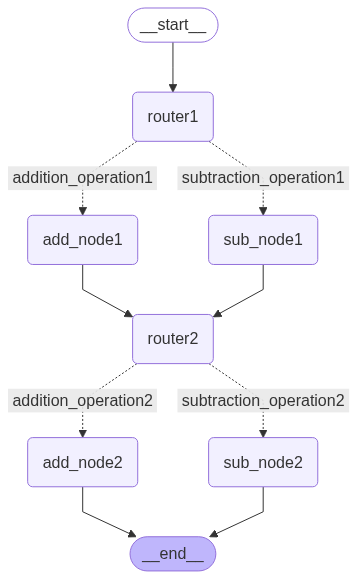

In [4]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [6]:
result = app.invoke({
    "number1": 3,
    "number2": 2,
    "operation1": "+",
    "number3": 1,
    "number4": 3,
    "operation2": "-"
})

print(result)

{'number1': 3, 'number2': 2, 'number3': 1, 'number4': 3, 'operation1': '+', 'operation2': '-', 'final_result1': 5, 'final_result2': 2}
